#1. Load the Dataset :

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np



# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

#Performing EDA

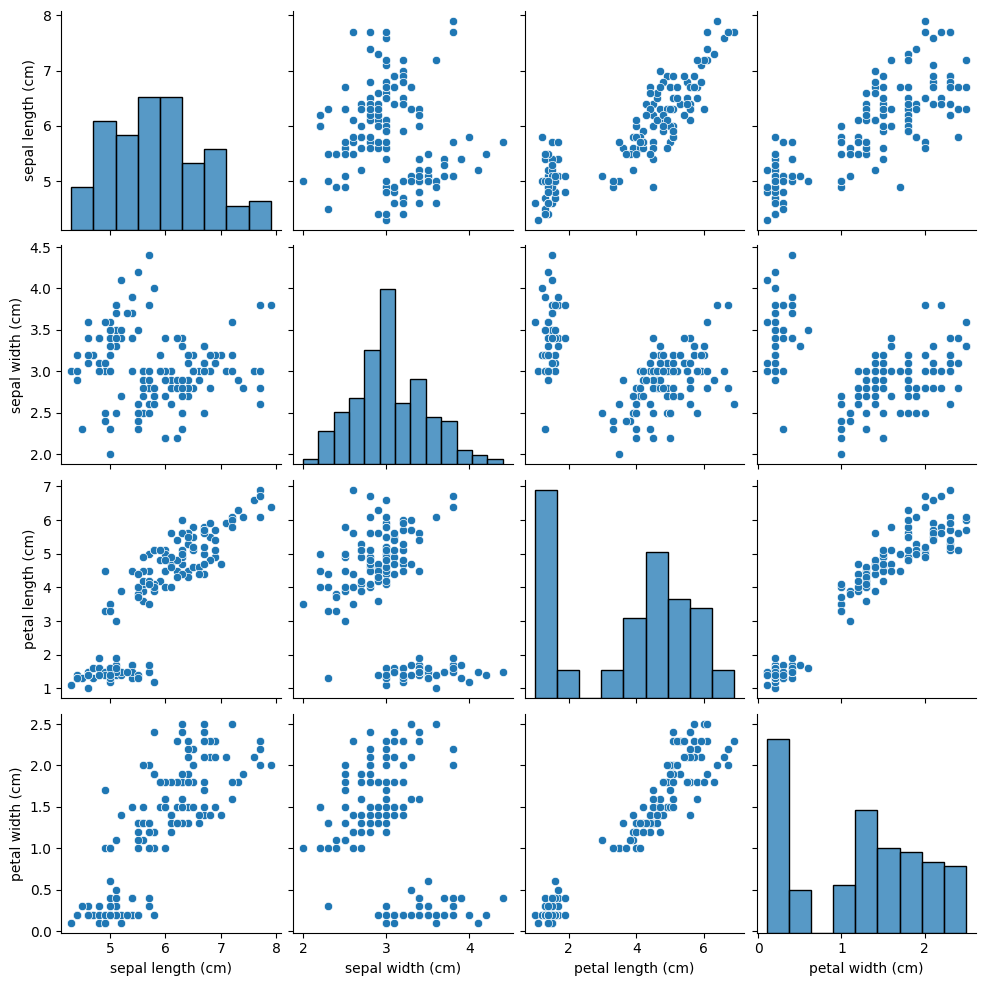

In [2]:
# EDA - Visualize data
sns.pairplot(data)
plt.show()


#2. Standardization:

In [3]:
# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)


#3. Compute the Covariance Matrix:



In [4]:
# Calculate the covariance matrix
cov_matrix = np.cov(standardized_data.T)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


#4. Eigenvalues and Eigenvectors:



In [5]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [6]:
# Print them to observe
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


#5. PCA Transformation:



In [7]:
# Sort eigenvectors based on eigenvalues
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]


In [8]:
# Project data onto the first two principal components
pca_data = np.dot(standardized_data, sorted_eigenvectors[:, :2])

#6. Visualization:



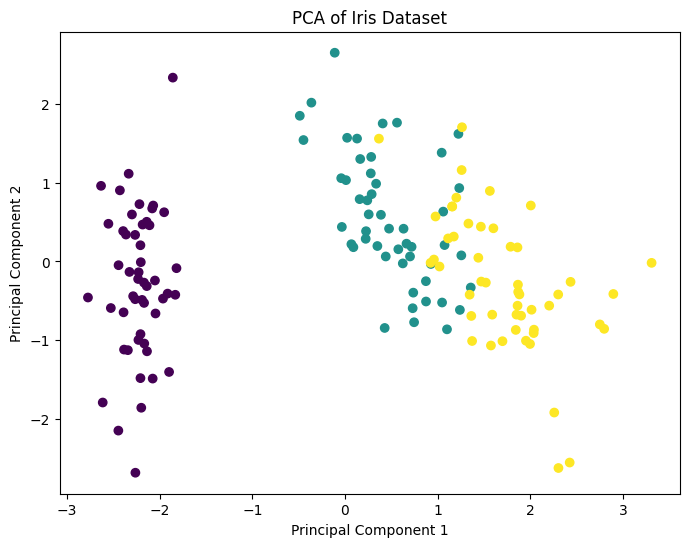

In [9]:
# Create a scatter plot of the transformed data
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()